In [1]:
import os
import django

os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [2]:
os.listdir('./data')

['test.csv', 'sample_submission.csv', 'train.csv']

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['test.csv', 'sample_submission.csv', 'train.csv']


In [4]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
train = pd.read_csv("data/train.csv", dtype = np.float32)

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
targets_numpy, targets_numpy.shape

(array([1., 0., 1., ..., 7., 6., 9.], dtype=float32), (42000,))

In [16]:
features_numpy = train.loc[:, train.columns != "label"].values / 255 # normalization
features_numpy, features_numpy.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (42000, 784))

In [19]:
# train test split. Size of train data is 80% and size of test data is 20%. 
from sklearn.model_selection import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)
features_train.shape, features_test.shape, targets_train.shape, targets_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [20]:
# create feature and targets tensor for train set. 
# As you remember we need variable to accumulate gradients. 
# Therefore first we create tensor, then we will create variable.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

In [21]:
# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [22]:
len(features_train)

33600

In [ ]:
"""
Epoch: An epoch refers to one complete pass through the entire dataset during the training of a model. 
In other words, during one epoch, the model has seen and trained on every sample in the dataset once. 
After each epoch, the model's parameters (weights and biases) are updated 
based on the optimization algorithm used (such as stochastic gradient descent).

Batch Size: The batch size refers to the number of training examples used in one iteration of training. 
Instead of updating the model's parameters after seeing every single training example (which can be computationally expensive), we typically use batches of examples. 
The batch size determines how many examples are processed in parallel before updating the model's parameters. Larger batch sizes can lead to faster training times but may require more memory. 
Common batch sizes are powers of 2, such as 32, 64, 128, etc.

Number of Iterations: The number of iterations refers to the number of updates to the model's parameters that are made during training. 
It is determined by the total number of training examples and the batch size. 
For example, if you have 1,000 training examples and a batch size of 100, you would have 10 iterations per epoch (since 1,000 / 100 = 10). 
In each iteration, the model processes one batch of examples, calculates the loss, and updates the parameters.
"""

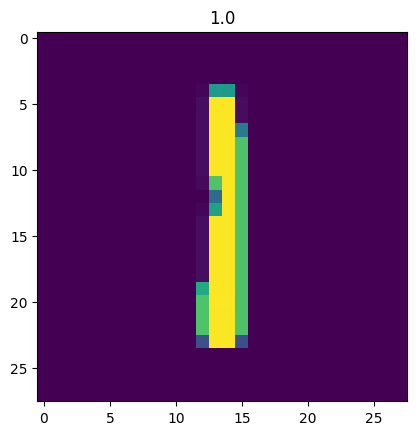

In [30]:
# visualize one of the images in data set
plt.imshow(features_numpy[2].reshape(28,28))
# plt.axis("off")
plt.title(str(targets_numpy[2]))
# plt.savefig('graph.png')
plt.show()

In [35]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(
            in_channels=1, 
            out_channels=16, 
            kernel_size=5, 
            stride=1, 
            padding=0
        )
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(
            in_channels=16, 
            out_channels=32, 
            kernel_size=5, 
            stride=1, 
            padding=0
        )
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

In [49]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
num_epochs

29

In [40]:
from torch.utils.data import TensorDataset, DataLoader

In [51]:
# Pytorch train and test sets
train = TensorDataset(featuresTrain, targetsTrain)
test = TensorDataset(featuresTest, targetsTest)

In [52]:
# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [43]:
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [53]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
                test = Variable(images.view(100, 1, 28, 28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print(f'Iteration: {count}  Loss: {loss.data}  Accuracy: {accuracy} %')

Iteration: 500  Loss: 0.04348314180970192  Accuracy: 98.22618865966797 %
Iteration: 1000  Loss: 0.02412315085530281  Accuracy: 98.22618865966797 %
Iteration: 1500  Loss: 0.04920962452888489  Accuracy: 98.22618865966797 %
Iteration: 2000  Loss: 0.020187783986330032  Accuracy: 98.22618865966797 %
Iteration: 2500  Loss: 0.027591384947299957  Accuracy: 98.22618865966797 %
Iteration: 3000  Loss: 0.014216499403119087  Accuracy: 98.22618865966797 %
Iteration: 3500  Loss: 0.04724019020795822  Accuracy: 98.22618865966797 %
Iteration: 4000  Loss: 0.01483717281371355  Accuracy: 98.22618865966797 %
Iteration: 4500  Loss: 0.041995514184236526  Accuracy: 98.22618865966797 %
Iteration: 5000  Loss: 0.011378416791558266  Accuracy: 98.22618865966797 %
Iteration: 5500  Loss: 0.07510748505592346  Accuracy: 98.22618865966797 %
Iteration: 6000  Loss: 0.06631986051797867  Accuracy: 98.22618865966797 %
Iteration: 6500  Loss: 0.010451197624206543  Accuracy: 98.22618865966797 %
Iteration: 7000  Loss: 0.04449970

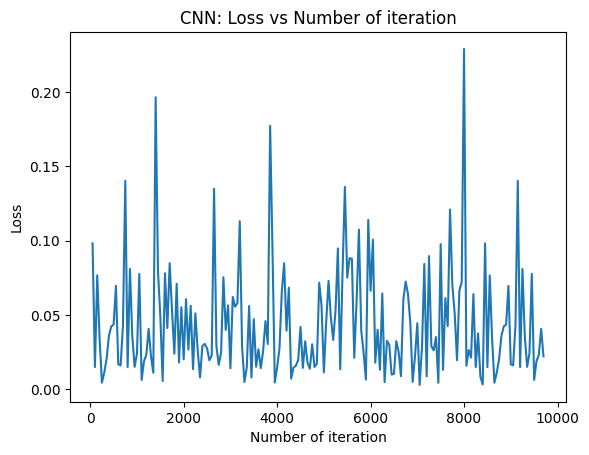

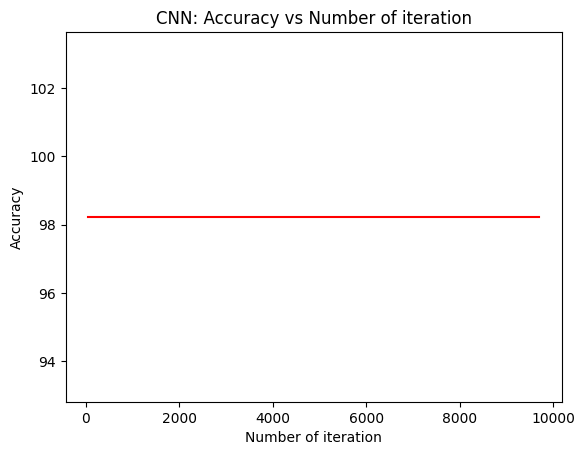

In [54]:
# visualization loss 
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list, accuracy_list, color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [55]:
torch.save(model.state_dict(), 'model.pt')

In [56]:
model = CNNModel()
model.load_state_dict(torch.load('model.pt'))
model.eval()

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)